import libraries

In [1]:
import pandas as pd

import project functions

### Select Hex set 

#### set of Hex ids 
#### POI category -> set of Hex ids that contain this category 
#### set of points e.g. GPS signals -> set of Hex ids that contain those signals

### Extract the subset of Hex 

In [3]:
# read the csvs without total cnt and shannon diversity index
table_digi = pd.read_csv('../data output/2 london_boundary_hex9_digi_type_cnt.csv')
# table_osm = pd.read_csv('../data output/superseded/london_boundary_hex9_osm_type_cnt.csv')

In [4]:
len(table_digi.columns.tolist())

218

In [5]:
# len(table_osm.columns.tolist())

### Transpose the table and get a Spearman Rank Correlation matrix for the POI categories within this set of Hex 

In [6]:
#https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php

In [7]:
rank_table = table_digi.corr(method='spearman')

In [8]:
rank_table.head()

,Adult shops,Adult venues,Airports and landing strips,Alcoholic drinks,Alcoholic drinks including off licences and wholesalers,Amusement parks and arcades,Angling and sports fishing,"Animal feeds, pet foods, hay and straw",Aquaria and sea life centres,Archaeological sites,...,Training providers and centres,"Tram, metro and light railway stations and stops",Travel agencies,Underground network stations,Unspecified and other attractions,Unspecified and other schools,Walk-in centre,Watersports,Youth accommodation,Zoos and animal collections
Adult shops,1.000000,-0.000743,-0.000587,-0.001600,0.052118,-0.002148,-0.000415,-0.000743,-0.000186,-0.002467,...,0.034225,0.032060,0.026861,0.016971,0.040010,-0.000788,-0.000643,-0.001218,-0.002313,-0.000765
Adult venues,-0.000743,1.000000,-0.000743,0.027101,0.023522,0.084380,-0.000525,-0.000939,-0.000235,0.015861,...,0.069037,0.024519,0.122728,0.075126,0.095153,-0.000997,0.071406,-0.001541,0.118765,-0.000968
Airports and landing strips,-0.000587,-0.000743,1.000000,-0.001600,0.031645,0.052804,-0.000415,-0.000743,-0.000186,-0.002467,...,-0.007558,-0.001745,0.004502,0.036927,-0.007013,-0.000788,-0.000643,-0.001218,-0.002313,-0.000765
Alcoholic drinks,-0.001600,0.027101,-0.001600,1.000000,0.053812,0.014451,-0.001131,-0.002024,-0.000506,0.010955,...,0.040415,-0.004756,0.082046,0.035947,0.058578,0.052782,-0.001752,0.014460,0.050282,-0.002086
Alcoholic drinks including off licences and wholesalers,0.052118,0.023522,0.031645,0.053812,1.000000,0.101679,-0.004610,0.014384,-0.002061,0.028350,...,0.150702,0.029182,0.222087,0.134678,0.169461,0.013065,0.010952,0.005251,0.081779,-0.008503


In [9]:
rank_table_plot = rank_table.iloc[:20,:20]

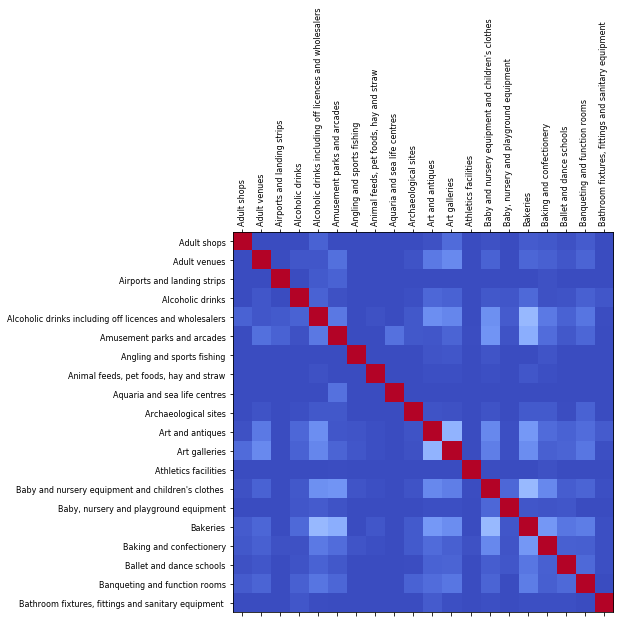

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

size = 7
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(rank_table_plot,cmap=cm.get_cmap('coolwarm'), vmin=0,vmax=1)
plt.xticks(range(len(rank_table_plot.columns)), rank_table_plot.columns, rotation='vertical', fontsize=8);
plt.yticks(range(len(rank_table_plot.columns)), rank_table_plot.columns, fontsize=8);

### Find the highest correlation pairs

In [12]:
rank_table_unstack = rank_table.unstack()
rank_table_unstack_sort = rank_table_unstack.sort_values(ascending=False).\
            reset_index().rename(columns={'level_0':'amenity1','level_1':'amenity2'})
highest_rank_table_unstack_sort = pd.DataFrame(rank_table_unstack_sort).rename(columns={0:'corr'})
highest_rank_table_unstack_sort.head()

,amenity1,amenity2,corr
0,Zoos and animal collections,Zoos and animal collections,1.0
1,Language schools,Language schools,1.0
2,"Leather goods, luggage and travel accessories ...","Leather goods, luggage and travel accessories ...",1.0
3,Leather products,Leather products,1.0
4,Lighting,Lighting,1.0


In [13]:
# exclude the same value pairs
highrank_table_greater = highest_rank_table_unstack_sort.query("amenity1!=amenity2 and corr>0.4 ").sort_values(by='corr', ascending=False)

In [14]:
# extract the unique value pairs by sorting the strings
highrank_table_greater['check_dupl_amenities'] = highrank_table_greater.apply(lambda row: ''.join(sorted([row['amenity1'], row['amenity2']])), axis=1)
highrank_table_greater.drop_duplicates('check_dupl_amenities', inplace=True)
highrank_table_greater.drop(columns=['check_dupl_amenities'], inplace=True)
highrank_table_greater
# reset index if it will be used somewhere

,amenity1,amenity2,corr
217,Convenience stores and independent supermarkets,Fast food and takeaway outlets,0.683095
219,"Cafes, snack bars and tea rooms",Restaurants,0.641559
221,"Cafes, snack bars and tea rooms",Fast food and takeaway outlets,0.639705
223,"Cafes, snack bars and tea rooms",Convenience stores and independent supermarkets,0.633230
225,Restaurants,Fast food and takeaway outlets,0.624828
227,Bookmakers,Fast food and takeaway outlets,0.584777
229,"Pubs, bars and inns",Restaurants,0.579894
232,Restaurants,Convenience stores and independent supermarkets,0.579643
233,"Pubs, bars and inns","Cafes, snack bars and tea rooms",0.557174
235,Bookmakers,Convenience stores and independent supermarkets,0.555568


### Visualisation of the matrix into dentrodiagram? 